# **Library**

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Import Data**

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/242 Data/cleaned_collision_train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/242 Data/cleaned_collision_train_data.csv')

# **Feature Selecting**

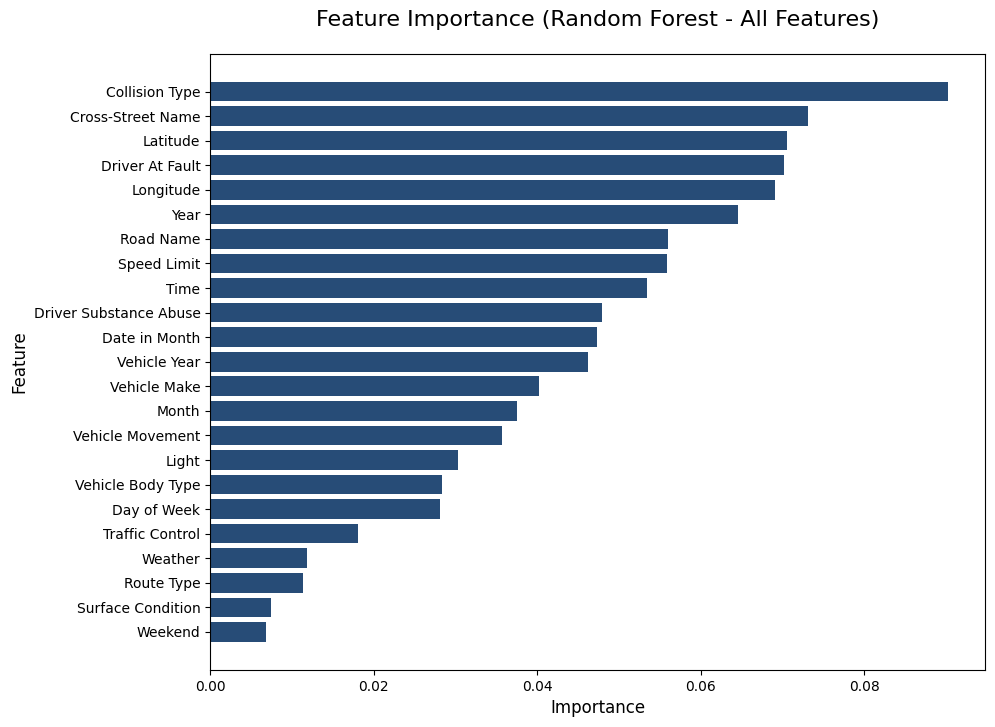

Top Features by Importance (All Features):
                   Feature  Importance
12          Collision Type    0.090246
2        Cross-Street Name    0.073095
9                 Latitude    0.070559
13         Driver At Fault    0.070169
10               Longitude    0.069115
21                    Year    0.064510
1                Road Name    0.055986
7              Speed Limit    0.055845
19                    Time    0.053367
6   Driver Substance Abuse    0.047892
22           Date in Month    0.047302
8             Vehicle Year    0.046203
15            Vehicle Make    0.040259
20                   Month    0.037516
16        Vehicle Movement    0.035732
5                    Light    0.030248
14       Vehicle Body Type    0.028395
17             Day of Week    0.028073
11         Traffic Control    0.018119
3                  Weather    0.011816
0               Route Type    0.011320
4        Surface Condition    0.007462
18                 Weekend    0.006770


In [5]:
train_data = pd.read_csv('/content/drive/MyDrive/242 Data/cleaned_collision_train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/242 Data/cleaned_collision_train_data.csv')

# Extract target column and features
target_column = 'ACRS Report Type'
if target_column in train_data.columns:
    y_train = train_data[target_column]
    y_test = test_data[target_column]
    X_train = train_data.drop(columns=[target_column])
    X_test = test_data.drop(columns=[target_column])
else:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")

# Encode categorical variables
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col], uniques = pd.factorize(X_train[col])
    X_test[col] = X_test[col].map({k: i for i, k in enumerate(uniques)}).fillna(-1).astype(int)

# Proceed with feature selection using Random Forest
rf_model_all_features = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=None,           # Allow full tree growth
    min_samples_leaf=10,      # Regularization
    n_jobs=-1,                # Use all CPU cores
    random_state=17,          # Reproducibility
    class_weight='balanced'   # Handle class imbalance
)

# Train the model using all features
rf_model_all_features.fit(X_train, y_train)

# Extract feature importance
feature_importances_all = rf_model_all_features.feature_importances_
features_all = X_train.columns

# Create a DataFrame for feature importance
feature_importance_df_all = pd.DataFrame({
    'Feature': features_all,
    'Importance': feature_importances_all
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df_all['Feature'], feature_importance_df_all['Importance'], color="#274C77")
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance (Random Forest - All Features)", fontsize=16, pad=20)
plt.gca().invert_yaxis()
plt.show()

# Display the top features
print("Top Features by Importance (All Features):")
print(feature_importance_df_all)

# **Final Version (SMOTE)**

<ipython-input-6-333fa0d6635b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected[col], uniques = pd.factorize(X_train_selected[col])
<ipython-input-6-333fa0d6635b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected[col] = X_test_selected[col].map({k: i for i, k in enumerate(uniques)}).fillna(-1).astype(int)
<ipython-input-6-333fa0d6635b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

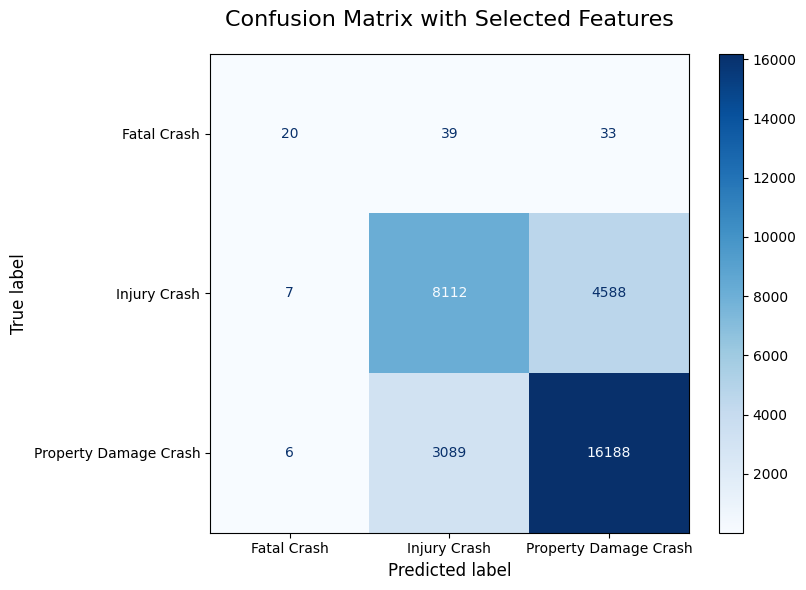

Confusion Matrix:
[[   20    39    33]
 [    7  8112  4588]
 [    6  3089 16188]]
Accuracy: 0.7581
Precision: 0.7552
Recall: 0.7581
F1-Score: 0.7546


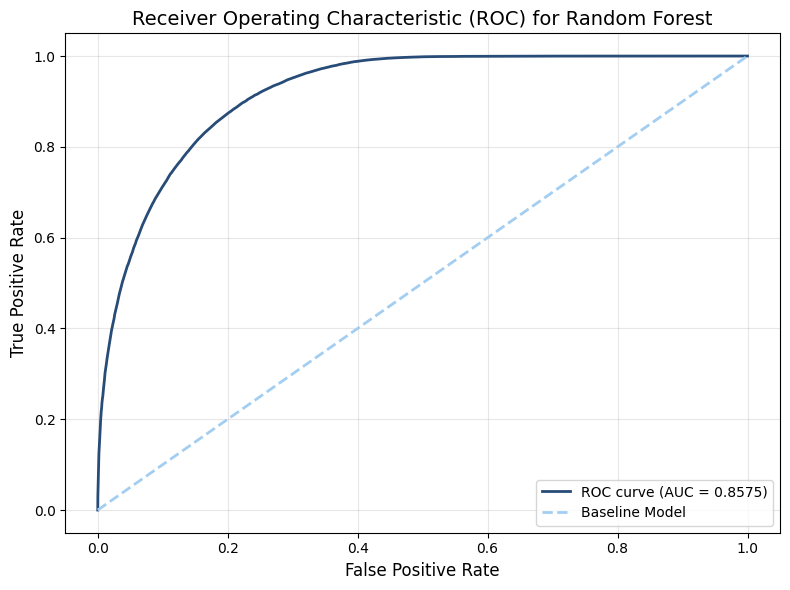

Macro-Averaged ROC-AUC Score: 0.8575


In [6]:
train_data = pd.read_csv('/content/drive/MyDrive/242 Data/cleaned_collision_train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/242 Data/cleaned_collision_test_data.csv')

# Target column
target_column = 'ACRS Report Type'
if target_column in train_data.columns:
    y_train = train_data[target_column]
    y_test = test_data[target_column]
    X_train = train_data.drop(columns=[target_column])
    X_test = test_data.drop(columns=[target_column])
else:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")

# Feature selection
selected_features = [
    'Collision Type', 'Latitude', 'Longitude',
    'Cross-Street Name', 'Driver At Fault', 'Road Name',
    'Speed Limit', 'Vehicle Movement', 'Day of Week',
    'Light', 'Date in Month', 'Month', 'Weather'
]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Encoding categorical columns
categorical_columns_selected = X_train_selected.select_dtypes(include=['object']).columns
for col in categorical_columns_selected:
    X_train_selected[col], uniques = pd.factorize(X_train_selected[col])
    X_test_selected[col] = X_test_selected[col].map({k: i for i, k in enumerate(uniques)}).fillna(-1).astype(int)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=1, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Initialize the Random Forest model
rf_model_updated = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    max_depth=None,    # Allow full tree growth
    min_samples_leaf=1,  # Regularization
    n_jobs=-1,         # Use all CPU cores
    random_state=17,   # Reproducibility
    max_features='log2'
)

# Fit the model with the resampled SMOTE data
rf_model_updated.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_updated = rf_model_updated.predict(X_test_selected)
y_pred_proba_updated = rf_model_updated.predict_proba(X_test_selected)

# Confusion matrix
conf_matrix_updated = confusion_matrix(y_test, y_pred_updated, labels=np.unique(y_train))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix_updated, display_labels=['Fatal Crash', 'Injury Crash', 'Property Damage Crash'])
disp.plot(cmap='Blues', ax=ax, colorbar=True)

plt.title("Confusion Matrix with Selected Features", fontsize=16, pad=20)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)
plt.tight_layout()
plt.show()

# Output metrics
classification_rep_updated = classification_report(y_test, y_pred_updated, output_dict=True)
accuracy_updated = (conf_matrix_updated.diagonal().sum()) / conf_matrix_updated.sum()
f1_score_updated = classification_rep_updated['weighted avg']['f1-score']
precision_updated = classification_rep_updated['weighted avg']['precision']
recall_updated = classification_rep_updated['weighted avg']['recall']

# Display metrics
print("Confusion Matrix:")
print(conf_matrix_updated)
print(f"Accuracy: {accuracy_updated:.4f}")
print(f"Precision: {precision_updated:.4f}")
print(f"Recall: {recall_updated:.4f}")
print(f"F1-Score: {f1_score_updated:.4f}")

# ROC-AUC Calculation
roc_auc_macro = roc_auc_score(pd.get_dummies(y_test), y_pred_proba_updated, average='macro')

fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pred_proba_updated.ravel())

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#274C77', lw=2, label=f"ROC curve (AUC = {roc_auc_macro:.4f})")
plt.plot([0, 1], [0, 1], color='#A3CEF1', linestyle='--', linewidth=2, label="Baseline Model")
plt.title("Receiver Operating Characteristic (ROC) for Random Forest", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Macro-Averaged ROC-AUC Score: {roc_auc_macro:.4f}")



# **Random Forest (Decision Tree - Selected Features)**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/drive/MyDrive/242 Data/cleaned_collision_train_data.csv')

# Define Features and Target
selected_features = [
    'Collision Type', 'Latitude', 'Longitude',
    'Cross-Street Name', 'Driver At Fault', 'Road Name',
    'Speed Limit', 'Vehicle Movement', 'Day of Week',
    'Light', 'Date in Month', 'Month', 'Weather'
]
target_column = 'ACRS Report Type'

data = data.dropna(subset=selected_features + [target_column])

X = data[selected_features]
y = data[target_column]

# Encode Categorical Features
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col], _ = pd.factorize(X[col])

# Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    class_weight='balanced',
    random_state=42
)
dt_model.fit(X_train_resampled, y_train_resampled)

# Visualize the Decision Tree
plt.figure(figsize=(200, 400))
plot_tree(dt_model,
          feature_names=selected_features,
          class_names=[str(cls) for cls in dt_model.classes_],
          filled=True, fontsize=8, rounded=True)
plt.title("Decision Tree Visualization with SMOTE-applied Data")
plt.show()

# **Show Encoded Variables - For Decision Tree Interpretation**

In [ ]:
print(factorize_mappings)

# **Mean and Standard Deviation for Speed Limit**

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/242 Data/dataMontgomery.csv', low_memory=False)

# Drop rows where 'Speed Limit' is 0 or NaN
data_filtered = data[data['Speed Limit'] > 0]

speed_limit_mean = data_filtered['Speed Limit'].mean()
speed_limit_std = data_filtered['Speed Limit'].std()

print(f"Mean of Speed Limit (after dropping 0): {speed_limit_mean:.2f}")
print(f"Standard Deviation of Speed Limit (after dropping 0): {speed_limit_std:.2f}")
